In [2]:
import numpy as np
import matplotlib.pyplot as mt
from scipy.linalg import eigh_tridiagonal

#Funciones utilizadas------------------------------------

#Diagonalización de  matrices tridiagonales
def diagonalizar_tridiagonal_simetrica(diagonal_principal, diagonal_superior):
    # Calcular autovalores y autovectores
    autovalores, autovectores = eigh_tridiagonal(diagonal_principal, diagonal_superior, eigvals_only=False)
    return autovalores,autovectores


In [69]:
#PROGRAMA--------------------------------------------------

#Fijamos valores del sistema
N=3000 #Número par
s=1/2#Spin individual
S=int(N*s)#Spin total
Ms=np.arange(S, -S - 1, -1)

#Matriz S_z----------------
S_z=np.diag(Ms)
#Matriz S_+----------------
def s_mas(m):
    return np.sqrt(S*(S+1)-m*(m+1))

S_mas = np.zeros((2*S+1, 2*S+1))
s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

for i in range(len(s_mas_vector)):
    S_mas[i, i + 1] = s_mas_vector[i]

#Matriz S_- -------------    
def s_menos(m):
    return np.sqrt(S*(S+1)-m*(m-1))

S_menos = np.zeros((2*S+1, 2*S+1))
s_menos_vector= s_menos(np.arange(S, -S, -1))

for i in range(len(s_menos_vector)):
    S_menos[i+1, i] = s_menos_vector[i]


#Matriz S_x
S_x=1/2 * (S_mas + S_menos)

Consideramos el hamiltoniano únicamente con el término cuadrático de $S_{z}$ y el de acoplo con el campo magnético externo:
\begin{equation}
H_{0} = -\frac{4 J}{N} S_{z}^{2}-2hS_{x}
\end{equation}

In [70]:
#Escogemos parámetros
J=1
h=0.1
H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x

#Obtenemos las autoenergías y autoestados diagonalizando la matriz:
autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))

#print(f'Los autovalores del hamiltoniano son: {autoenergias}')

Dada la degeneración que nos aparece en las energías más pequeñas, mayormente notable para valores de h <= 2 tenemos problemas para definir los autoestados que nos caracterizan las autoenergías. Por ello introducimos un término de ruptura de simetría que nos permita romper la degeneración sin modificar las propiedades del sistema físico en cuestión. El hamiltoniano queda:
\begin{equation}
H = H_{0} + \epsilon S_{Z}
\end{equation}

In [71]:
J=1
h=0.1
epsilon=10**(-6)
H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x + epsilon*S_z

#Obtenemos las autoenergías diagonalizando la matriz:
autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))


Ahora ya podemos calcular el valor esperado del operador $S_{Z}$ y así dar un valor a la magnetización en cada autoestado de nuestro sistema:

In [72]:
magn=[]
for i in range(int(N+1)):
    magn.append((autovectores[:,i] @ (Ms*autovectores[:,i]).T))   

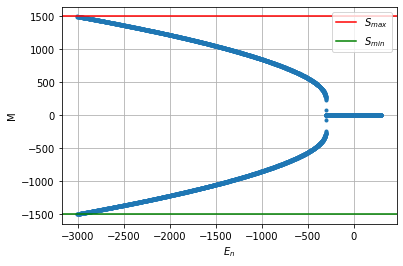

In [73]:
#Representación del valor promedio de S_z normalizado frente a las energías obtenidas
mt.plot(autoenergias,magn,'.')
mt.axhline(y=N/2,color='red',label="$S_{max}$")
mt.axhline(y=-N/2,color='green',label="$S_{min}$")
mt.xlabel("$E_{n}$")
mt.ylabel("M")
mt.legend()
mt.grid()
mt.show()



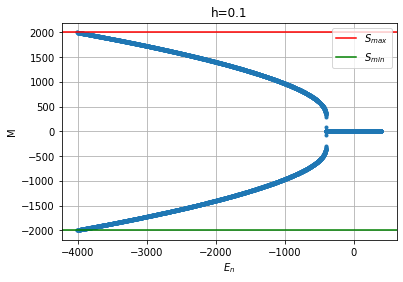

In [16]:
#Creamos una función para poder obtener fácilmente el diagrama de magnetización frente a energía dado un valor de la cte de acoplo h y N
def diagrama_de_fases(h,N):
    s=1/2#Spin individual
    S=int(N*s)#Spin total
    Ms=np.arange(S, -S - 1, -1)
    #Matriz S_z----------------
    S_z=np.diag(Ms)
    #Matriz S_+----------------

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x

    S_x=1/2 * (S_mas + S_menos)
    #Hamiltoniano
    J=1
    epsilon=10**(-6)
    H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x + epsilon*S_z

    #Obtenemos las autoenergías diagonalizando la matriz:
    autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))
    magn=[]
    for i in range(int(N+1)):
        magn.append((autovectores[:,i] @ (Ms*autovectores[:,i]).T))  
    #Representación del valor promedio de S_z frente a las energías obtenidas
    mt.plot(autoenergias,magn,'.')
    mt.axhline(y=N/2,color='red',label="$S_{max}$")
    mt.axhline(y=-N/2,color='green',label="$S_{min}$")
    mt.xlabel("$E_{n}$")
    mt.ylabel("M")
    mt.title(f'h={h}')
    mt.legend()
    mt.grid()
    mt.show()
    return
diagrama_de_fases(0.1,4000)


Observaciones de los diagramas de fases:

1. El estado fundamental es aquel de menor energía (T = 0). Observamos que para h<2J el estado fundamental se sitúa en un valor con M $\neq$ 0, lo que nos indica que el sistema se encuentra en estado ferromagnético. Sin embargo, para h>2J todos los autoestados del sistema tienen una magnetización M=0 y el estado fundamental por ende también. Este es el estado paramagnético. Aquí encontramos entonces la línea crítica h=2J (para un N suficientemente alto) que marca la transición de fase en estado fundamental QPT. Algo que observamos también es que según nos acercamos a h=2J la cantidad de autoestados con magnetización no nula disminuye hasta hacerse cero.




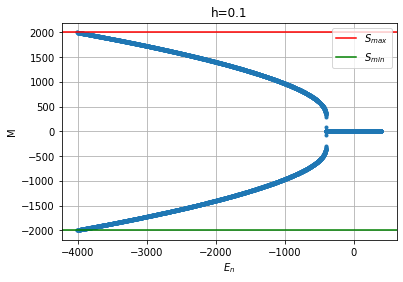

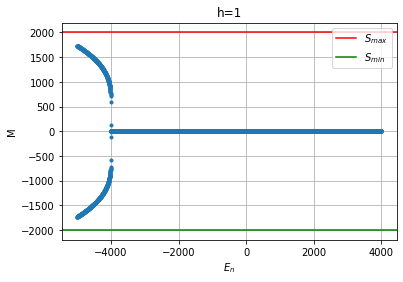

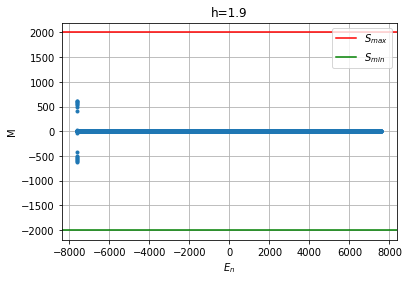

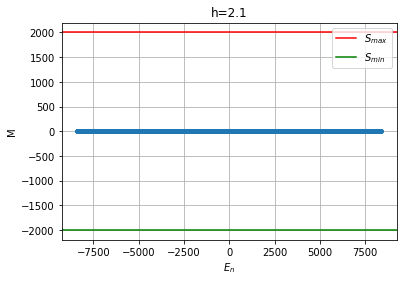

In [8]:
diagrama_de_fases(0.1,4000)
diagrama_de_fases(1,4000)
diagrama_de_fases(1.9,4000)
diagrama_de_fases(2.1,4000)


2. También aquí observamos la manifestación de una ESQPT, pues aún cuando h<2J y existen estados de baja energía con M $\neq$ 0, podemos observar una transición de fase entre las fases ferromagnético y paramagnético para una cierta energía crítica $E_{c}$; siendo ferromagnético para E<$E_{c}$ y paramagnético E>$E_{c}$. Esta energía crítica disminuye según h se acerca a la línea crítica como se muestra en las gráficas.

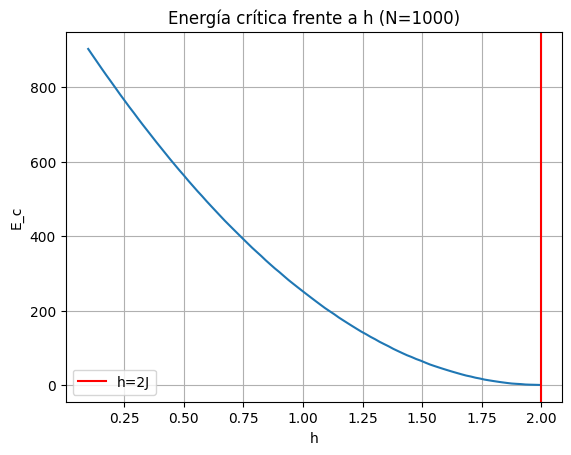

In [3]:
#Definimos una función para obtener la energía crítica en función de h y N
def E_c(h,N):
    s=1/2#Spin individual
    S=int(N*s)#Spin total
    Ms=np.arange(S, -S - 1, -1)
    #Matriz S_z----------------
    S_z=np.diag(Ms)
    #Matriz S_+----------------

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x

    S_x=1/2 * (S_mas + S_menos)
    #Hamiltoniano
    J=1
    epsilon=10**(-6)
    H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x + epsilon*S_z

    #Obtenemos las autoenergías diagonalizando la matriz:
    autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))
    for i in range(int(N+1)):
        M=(autovectores[:,i] @ (Ms*autovectores[:,i]).T)
        if abs(M)<=1e-2:#Cota elegida observando las M que se pueden considerar aprox nulas
            Ec=np.abs(autoenergias[0])-np.abs(autoenergias[i])
            break
       
    
    return Ec

#Representación de E_c en función de h:
E_c_np=np.vectorize(E_c)
h_p=np.linspace(0.1,1.99,100)
mt.plot(h_p,E_c_np(h_p,1000))
mt.xlabel("h")
mt.ylabel("E_c")
mt.axvline(x=2,color='red',label="h=2J")
mt.title("Energía crítica frente a h (N=1000)")
mt.legend()
mt.grid()
mt.show()
    
    

3. Modificando N podemos observar que se cumple que a menor N también disminuye la energía crítica aunque el comportamiento general del diagrama se cumple. Esto es, para valores de h menor a un valor crítico se observan una serie de autoenergías para las que la magnetización es prácticamente nula y una bifurcación que termina en una máxima magnetización para el estado de mínima energía; mientras tanto, para un h mayor a ese valor crítico todos los autoestados presentan magnetización nula.

    Algo que observamos también es que el valor crítico $h_{c}$ sí depende del tamaño del sistema, es decir, de N. Esto se observa en que según disminuye N, para un valor fijo de h, el punto de la bifurcación se acerca más al estado fundamental hasta llegar a este en un valor concreto. Esto implica que para un valor de h concreto, un material puede ser paramagnético para un N y ferromagnético para otro en el estado fundamental. Un caso concreto es h=1 para N=100 (ferromagnético) y N=10 (paramagnético). Sin embargo, en el límite termodinámico $h_{c} \longrightarrow 2$ para cualquier N alto.

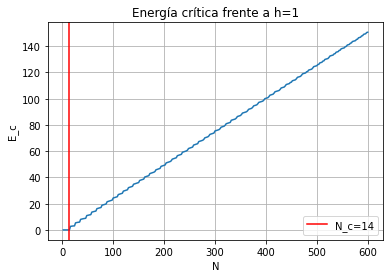

In [6]:
h_0=1
N_p= np.round(np.linspace(2, 600, 300) / 2) * 2
mt.plot(N_p,E_c_np(h_0,N_p))
mt.xlabel("N")
mt.ylabel("E_c")
mt.title(f'Energía crítica frente a h={h_0}')
mt.grid()
mt.axvline(x=14,label='N_c=14', color='red')
mt.legend()
mt.show()

Para N próximos a cero observamos que la energía crítica es cero para un h dado que pertenece a los valores para los que el material es ferromagnético $M \neq 0$. Esto nos puede llevar a pensar que existe un $N_{c}$ crítico para el que el material cambia de propiedades dado el acoplo h. Sin embargo, esto aparece por la cota que se escoge para considerar que un valor es cero, pues para valores suficientemente grandes de N el valor de la magnetización que empieza a ser distinta de cero es mayor que para los de menor N. Por consiguiente, no se puede escoger una cota que funcione para todos los N.

Graficando M frente a $E_{n}$ vemos que para un h para en que el material es ferromagnético, efectivamente lo es para cualquier N que tengamos.

A continuación, dividamos entre un factor proporcional a N para eliminar la extensividad de la magnetización y la energía del sistema y poder arreglar este problema y sacar una energía crítica por número de spines (dado un $h$).

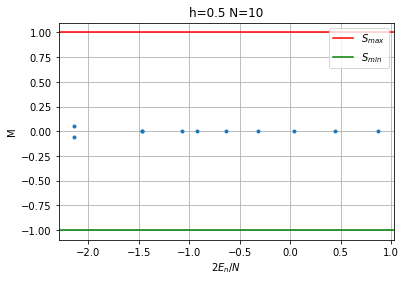

Energia crítica: 1.0655536866316242


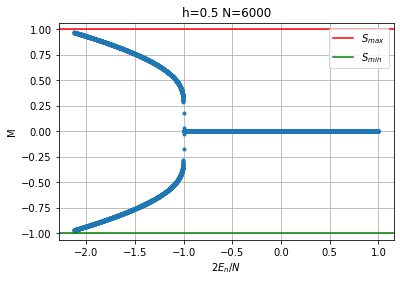

Energia crítica: 1.125473733160665


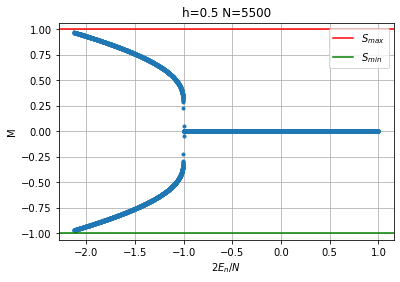

Energia crítica: 1.125427856619877


In [68]:
def E_c_norm(h,N):
    s=1/2#Spin individual
    S=int(N*s)#Spin total
    Ms=np.arange(S, -S - 1, -1)
    #Matriz S_z----------------
    S_z=np.diag(Ms)
    #Matriz S_+----------------

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x

    S_x=1/2 * (S_mas + S_menos)
    #Hamiltoniano
    J=1
    epsilon=10**(-6)
    H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x + epsilon*S_z

    #Obtenemos las autoenergías diagonalizando la matriz:
    autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))
    magn=[]
    for i in range(int(N+1)):
        M=(autovectores[:,i] @ (Ms*autovectores[:,i]).T*1/(N/2))
        if abs(M)<=1e-4:#Cota elegida observando las M que se pueden considerar aprox nulas
            Ec=(np.abs(autoenergias[0])-np.abs(autoenergias[i]))/(N/2)
            break
    for j in range(int(N+1)):
        magn.append((autovectores[:,j] @ (Ms*autovectores[:,j]).T)*1/(N/2))
    #Representación del valor promedio de S_z frente a las energías obtenidas
    mt.plot(autoenergias/(N/2),magn,'.')
    mt.axhline(y=1,color='red',label="$S_{max}$")
    mt.axhline(y=-1,color='green',label="$S_{min}$")
    mt.xlabel("$2E_{n}/N$")
    mt.ylabel("M")
    mt.title(f'h={h} N={N}')
    mt.legend()
    mt.grid()
    mt.show()    
    print(f'Energia crítica: {Ec}')
    return 

E_c_norm(0.5,10)
E_c_norm(0.5,6000)
E_c_norm(0.5,5500)

Se ha escogido el factor N/2 para eliminar la extensividad y a la vez tener una magnetización entre -1 y +1. Las conclusiones que podemos sacar de aquí son:

-La energía crítica por número de partículas a la que se tiende para N suficientemente grandes es un número fijo que depende únicamente de h, para nuestro ejemplo de $\textbf{h=0.5}$ es:
\begin{equation*}
\boxed{
    E_c/N  \approx 0.5627
    }
\end{equation*}
en las unidades adecuadas. Aumentando el número de N se puede obtener un valor con más decimales.